In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from funcs import *
from logisticregressionClass import *
np.random.seed(0)

## 构造数据

In [4]:
# 创建数据
from sklearn.model_selection import train_test_split
X = np.linspace(0,2,100).reshape(-1,1)
X_temp = X + 0.1*np.random.randn(X.shape[0],X.shape[1])
y = X_temp>1

test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_ratio)

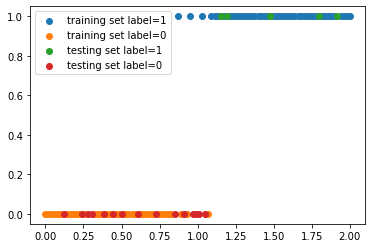

In [5]:
plt.scatter(X_train[y_train==1], y_train[y_train==1], label="training set label=1")
plt.scatter(X_train[y_train==0], y_train[y_train==0], label="training set label=0")
plt.scatter(X_test[y_test==1], y_test[y_test==1], label="testing set label=1")
plt.scatter(X_test[y_test==0], y_test[y_test==0], label="testing set label=0")
plt.legend()
plt.show()

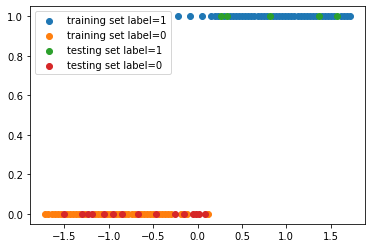

In [6]:
# 将数据标准化和多项式处理
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
standard_scaler = StandardScaler()
poly_features = PolynomialFeatures(degree=1, include_bias=True)
processing = Pipeline([('standardscaler',standard_scaler),('polyfeatures',poly_features)])
processing.fit(X)

# 处理后的特征
X_train_b = processing.transform(X_train)
X_test_b = processing.transform(X_test)

# 标准化后的数据的绘制
plt.scatter(X_train_b[:,1:][y_train==1], y_train[y_train==1], label="training set label=1")
plt.scatter(X_train_b[:,1:][y_train==0], y_train[y_train==0], label="training set label=0")
plt.scatter(X_test_b[:,1:][y_test==1], y_test[y_test==1], label="testing set label=1")
plt.scatter(X_test_b[:,1:][y_test==0], y_test[y_test==0], label="testing set label=0")
plt.legend()
plt.show()

In [7]:
# 创建逻辑回归类
logistic = logisticRegression(standarscaler=False)

In [8]:
logistic.fit(X_train, y_train, alpha=0.1, iters=1000)
print("训练集精确度",logistic.train_accuracy())

训练集精确度 0.9625


In [9]:
# 测试集精确度
y_test_pre = logistic.predict(X_test)
logistic.accuracy(y_test_pre, y_test)

0.75

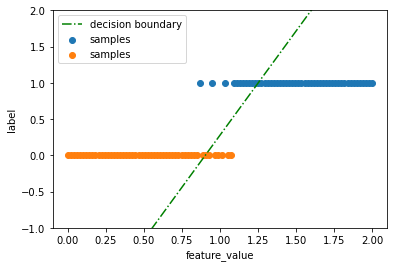

In [10]:
# 绘制决策边界 - 法一
x_decision_boundary = np.array([[X.min()], [X.max()]])
x_decision_boundary_b = poly_features.transform(x_decision_boundary)
# 获得logistc类中的linear拟合的theta
# 当样本点在线性回归中大于0，则在sigmoid中被分类为1,反之分类为0
theta = logistic.theta
y_decision_boundary = x_decision_boundary_b.dot(theta)

plt.scatter(X[y==1], y[y==1], label="samples")
plt.scatter(X[y==0], y[y==0], label="samples")
plt.plot(x_decision_boundary, y_decision_boundary, 'g-.', label="decision boundary")
plt.ylim(-1,2)
plt.xlabel("feature_value")
plt.ylabel("label")
plt.legend()
plt.show()

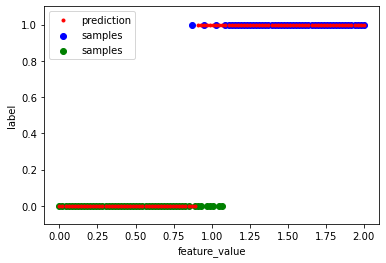

In [11]:
# 绘制决策边界 - 法二
meshs = 100
x_meshs = np.linspace(X.min(), X.max(), meshs)
y_meshs = np.zeros_like(x_meshs)
for index,i in enumerate(x_meshs):
    y_pre = logistic.predict(np.array([[i]]))
    if y_pre==1:
        y_meshs[index] = 1

plt.plot(x_meshs, y_meshs, 'r.', label="prediction")
plt.scatter(X[y==1], y[y==1], color='b', label="samples")
plt.scatter(X[y==0], y[y==0], color='g', label="samples")
plt.ylim(-0.1,1.1)
plt.xlabel("feature_value")
plt.ylabel("label")
plt.legend()
plt.show()      

## 多项式

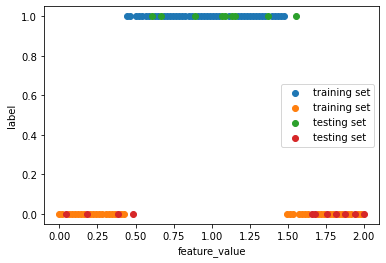

In [39]:
# 创建数据
from sklearn.model_selection import train_test_split
X = np.linspace(0,2,100).reshape(-1,1)
X_temp = X + 0.05*np.random.randn(X.shape[0],X.shape[1])
y = ((X_temp > 0.5) == (X_temp<1.5))

test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_ratio)

plt.scatter(X_train[y_train==1], y_train[y_train==1], label="training set")
plt.scatter(X_train[y_train==0], y_train[y_train==0], label="training set")
plt.scatter(X_test[y_test==1], y_test[y_test==1], label="testing set")
plt.scatter(X_test[y_test==0], y_test[y_test==0], label="testing set")
plt.xlabel("feature_value")
plt.ylabel("label")
plt.legend()
plt.show()

### 关闭多项式用于对比

In [37]:
# 创建逻辑回归类
logistic = logisticRegression(standarscaler=False)
# 训练
logistic.fit(X_train, y_train, alpha=0.1, iters=1000)
print("训练集精确度",logistic.train_accuracy())
# 测试集精确度
y_test_pre = logistic.predict(X_test)
print("测试集精确度",logistic.accuracy(y_test_pre, y_test))

训练集精确度 0.625
测试集精确度 0.65


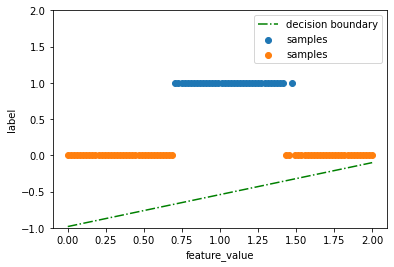

In [38]:
# 绘制决策边界
x_decision_boundary = np.array([[X.min()], [X.max()]])
x_decision_boundary_b = poly_features.transform(x_decision_boundary)
# 获得logistc类中的linear拟合的theta
# 当样本点在线性回归中大于0，则在sigmoid中被分类为1,反之分类为0
theta = logistic.theta
y_decision_boundary = x_decision_boundary_b.dot(theta)

plt.scatter(X[y==1], y[y==1], label="samples")
plt.scatter(X[y==0], y[y==0], label="samples")
plt.plot(x_decision_boundary, y_decision_boundary, 'g-.', label="decision boundary")
plt.ylim(-1,2)
plt.xlabel("feature_value")
plt.ylabel("label")
plt.legend()
plt.show()

### 多项式处理

In [69]:
poly_degree = 3
# 创建逻辑回归类
logistic = logisticRegression(polynomial_degree=poly_degree,standarscaler=False)
# 训练
logistic.fit(X_train, y_train, alpha=0.1, iters=1000)
print("训练集精确度",logistic.train_accuracy())
# 测试集精确度
y_test_pre = logistic.predict(X_test)
print("测试集精确度",logistic.accuracy(y_test_pre, y_test))

训练集精确度 0.925
测试集精确度 0.85


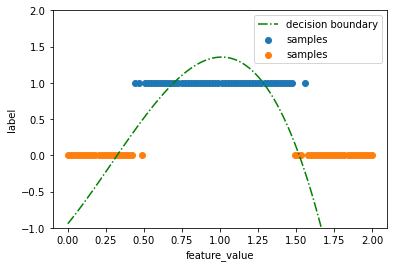

In [70]:
# 绘制决策边界
x_decision_boundary = np.linspace(X.min(), X.max(),100).reshape(-1,1)
poly_features = PolynomialFeatures(degree=poly_degree, include_bias=True)
x_decision_boundary_process = poly_features.fit_transform(x_decision_boundary)
# 获得logistc类中的linear拟合的theta
# 当样本点在线性回归中大于0，则在sigmoid中被分类为1,反之分类为0
theta = logistic.theta
y_decision_boundary = x_decision_boundary_process.dot(theta)

plt.scatter(X[y==1], y[y==1], label="samples")
plt.scatter(X[y==0], y[y==0], label="samples")
plt.plot(x_decision_boundary, y_decision_boundary, 'g-.', label="decision boundary")
plt.ylim(-1,2)
plt.xlabel("feature_value")
plt.ylabel("label")
plt.legend()
plt.show()